In [6]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

In [7]:
# Import image
imq3_bgr = cv.imread('a1images/highlights_and_shadows.jpg')
assert imq3_bgr is not None
imq3_lab = cv.cvtColor(imq3_bgr, cv.COLOR_BGR2LAB)
imq3_rgb = cv.cvtColor(imq3_bgr, cv.COLOR_BGR2RGB)

In [8]:
# Split the image in to L*a*b* color space
L,a,b = cv.split(imq3_lab)

# Define and apply gamma transformation
gamma = 0.75
t = np.array([(i/255.0)**(gamma)*255 for i in np.arange(0, 256)]).astype('uint8')
L_modified = cv.LUT(L, t)

# Merge the channels
merged = cv.merge([L_modified, a, b])
imq3_modified = cv.cvtColor(merged, cv.COLOR_LAB2RGB)


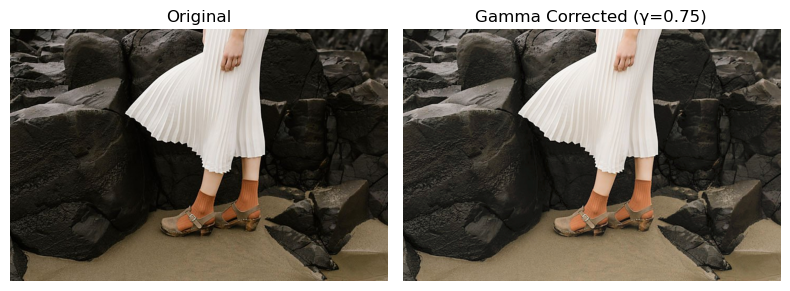

In [9]:
# Create a figure and axes
fig, axs = plt.subplots(1, 2, figsize=(8, 6))

# Plot the first image
axs[0].imshow(imq3_rgb)
axs[0].set_title('Original')
axs[0].axis('off')  # Turn off the axis

# Plot the second image
axs[1].imshow(imq3_modified)
axs[1].set_title(f'Gamma Corrected (γ={gamma})')
axs[1].axis('off')  # Turn off the axis

# Show the plot
plt.tight_layout()
plt.show()

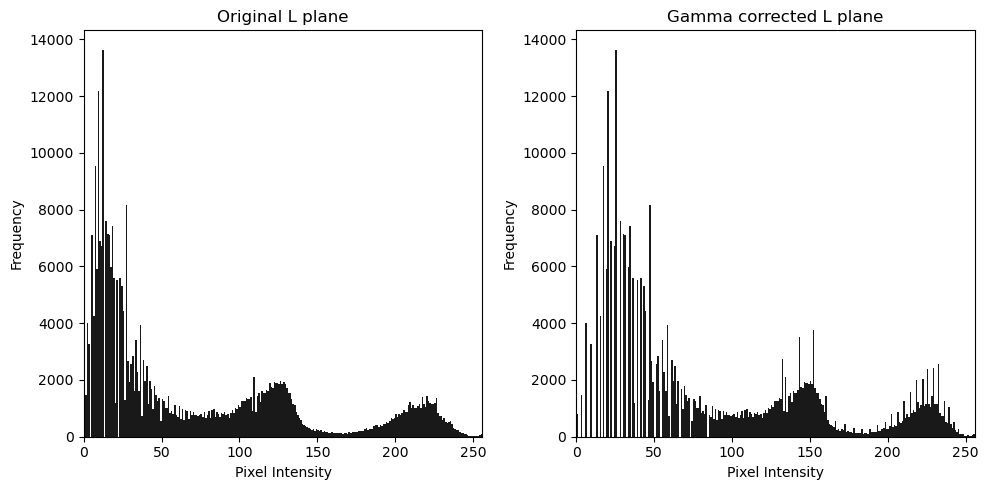

In [10]:
# Compute the histograms for both images
hist1 = cv.calcHist([L], [0], None, [256], [0, 256])
hist2 = cv.calcHist([L_modified], [0], None, [256], [0, 256])

L_flat = L.flatten()
L_modified_flat = L_modified.flatten()

# Create a figure with two subplots
plt.figure(figsize=(10, 5))

# First subplot: Histogram of the first image
plt.subplot(1, 2, 1)
plt.hist(L_flat, bins=256, range=(0, 256), color='black', alpha=0.9)
plt.title('Original L plane')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.xlim([0, 256])

# Second subplot: Histogram of the second image
plt.subplot(1, 2, 2)
plt.hist(L_modified_flat, bins=256, range=(0, 256), color='black', alpha=0.9)
plt.title('Gamma corrected L plane')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.xlim([0, 256])

# Display the plots side by side
plt.tight_layout()  # Adjusts the spacing between subplots for a neat layout
plt.show()

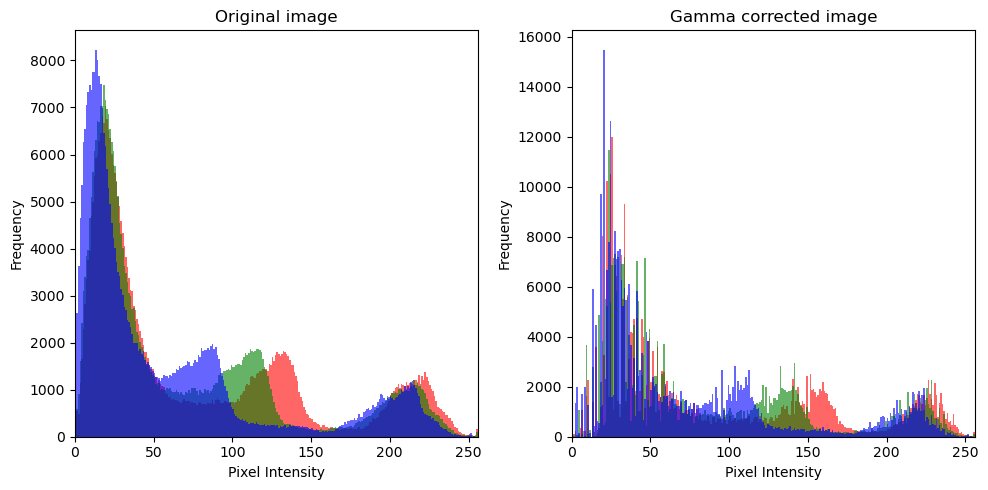

In [11]:
# Color channels
colors = ('r', 'g', 'b')  # Color channels
plt.figure(figsize=(10, 5))

# First image's histograms
plt.subplot(1, 2, 1)
for i, col in enumerate(colors):
    # Flatten the channel
    channel_flat = imq3_rgb[:, :, i].flatten()  # Extract and flatten the red, green, or blue channel
    plt.hist(channel_flat, bins=256, range=(0, 256), color=col, alpha=0.6)  # Use plt.hist
plt.title('Original image')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.xlim([0, 256])

# Second image's histograms
plt.subplot(1, 2, 2)
for i, col in enumerate(colors):
    # Flatten the channel
    channel_flat = imq3_modified[:, :, i].flatten()  # Extract and flatten the channel
    plt.hist(channel_flat, bins=256, range=(0, 256), color=col, alpha=0.6)  # Use plt.hist
plt.title('Gamma corrected image')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.xlim([0, 256])

# Display the plots side by side
plt.tight_layout()  # Adjusts the spacing between subplots for a neat layout
plt.show()